# "Mean, Variance and Standard deviation of a sample"
> "Estimating variance and standard deviation of a sample drawn from a normal distribution"
- toc: false
- branch: master
- badges: true
- comments: true
- categories: [Statistics, variance, Python]
- image: images/
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2
- use_math: true

In this notebook, we will see how to correctly ***estimate*** variance and standard deviation from a sample drawn from a normal distribution. This notebook is inspired from one of the [videos](https://www.youtube.com/watch?v=SzZ6GpcfoQY&list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9&index=5&ab_channel=StatQuestwithJoshStarmer) of Joshua Starmer.  

In [1]:
# Let's first load our numerical Python library
import numpy as np

In [2]:
# Get a normal distribution with mean 50 and standard deviation of 10. 
population = np.random.normal(50,10,1000) 
print(population)

[58.51096494 54.35604739 31.33596155 36.57228386 42.90854289 36.97196961
 35.13454667 55.25576274 51.56395122 41.97458864 50.27704343 36.86389636
 53.38015128 62.93762022 57.42527844 58.04615529 60.57570213 52.1408575
 34.20236425 45.22173563 46.13978888 59.43242208 33.51554549 56.62330495
 54.75329618 49.36186641 38.83343647 47.47763538 46.91126975 47.29980537
 52.23450113 44.24877717 59.46549651 61.70291118 59.4483032  41.857741
 45.41888587 53.85452025 42.36669454 35.65081016 48.04063376 63.99663189
 40.68565984 51.37703171 54.4172925  57.46578844 46.27661915 58.03179744
 62.51838416 62.98572275 51.52055047 19.66066686 43.34078901 64.6356989
 52.92457845 64.06370046 42.01320803 50.467454   58.05187468 54.09740891
 52.16034583 68.57232819 40.78513094 43.75226304 41.93004599 57.26628367
 55.34516409 42.14888487 52.0272703  37.37381092 52.45937831 42.11467659
 40.79862197 55.38373167 52.52087153 66.45867675 54.12912889 47.80582615
 43.41857924 57.36261701 70.58417248 42.06219855 53.071

Our population is a normal(Gaussian) distribution with a mean of 50 and standard deviation of 10. Let's plot it...

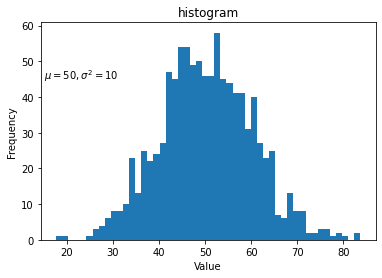

In [3]:
from matplotlib import pyplot as plt  # For plotting
   
plt.hist(population,50)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.text(15, 45, r'$\mu=50, \sigma^2=10$') 
plt.title("histogram") 
plt.show()

Now, we will draw a random sample from our normal distribution. 

In [4]:
# Draw 100 random samples from population
sample = np.random.choice(population, 100)

In [5]:
# calculate mean of sample
mean_sample = np.mean(sample)
print("sample mean = ", mean_sample)


sample mean =  49.39970427108535


We can see that the mean of the sample (49.81) is near to the actual mean of population. This was expected as we have less data in the sample. Let's now try to ***estimate*** the variance and standard deviation of the population from the sample data. Please note that one can only ***estimate*** and not ***calculate*** the  variance and standard deviation of the population. This is because most of the times, we don't have the original population but only a small sample. The formula to estimate the variance and standard deviation of the population is as follows:

$$\sigma^2_{estimated} = \frac{\Sigma (x - \bar{x})}{n-1} $$

Where, $\bar{x}$ is the mean of the sample, x is the individual value in the sample, and n is total number of measurements in the sample (100 in our case). Please note that in the equation, we use $n-1$ and not $n$. This is because we will underestimate our variance if we divide by $n$. For a very detailed proof, please refer to this [video](https://www.youtube.com/watch?v=sHRBg6BhKjI&ab_channel=StatQuestwithJoshStarmer). Let's see if this is true... 

In [6]:
# estimate variance and standard deviation of the sample

est_variance = np.var(sample, ddof = 1) # ddof = 1 means we divide by total number of measurements - 1
std_sample = np.sqrt(est_variance)
print("Estimated variance = ", est_variance, "and estimated standard deviation = ", std_sample)

Estimated variance =  116.17893624576945 and estimated standard deviation =  10.778633319942257


Let's now estimate incorrect variance and standard deviation

In [7]:
# incorrect variance and standard deviation

incorrect_variance = np.var(sample)
incorrect_std_sample = np.std(sample)
print(f'Incorrect variance is {incorrect_variance} and biased standard deviation is {incorrect_std_sample}')

Incorrect variance is 115.01714688331177 and biased standard deviation is 10.724604742521366


As one can see, we underestimated both variance and standard deviation if we use incorrect formula.